In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import kpss, adfuller

In [2]:
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="BIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [3]:
df = pd.read_csv("../Data/American Companies/AAPL 1980 2022.csv")
dates = pd.to_datetime(df.Date, dayfirst= True)
open_prices = df.Open

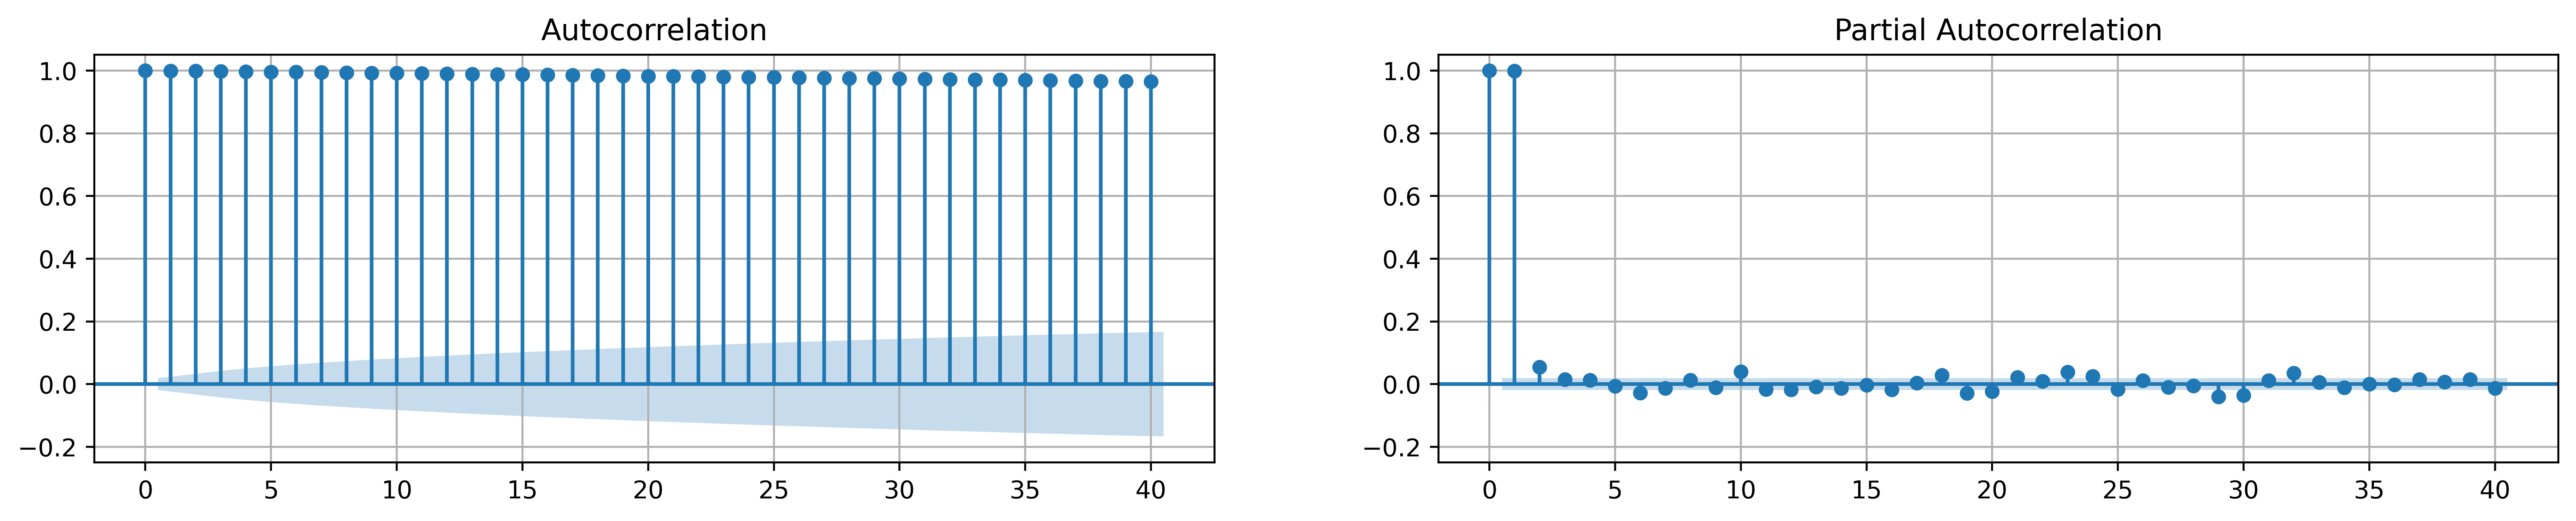

In [4]:
plt.rcParams.update({'figure.dpi' : 500})
f = plt.figure(figsize= (18, 3))

ax1 = f.add_subplot(121)
plot_acf(open_prices, ax= ax1, lags= 40);
ax1.set_ylim(bottom= -0.25, top= 1.05)
plt.grid(True)

ax2 = f.add_subplot(122)
plot_pacf(open_prices, method= "ywm", ax= ax2, lags= 40);
ax2.set_ylim(bottom= -0.25, top= 1.05)
plt.grid(True)

# plt.savefig("acf_pacf_for_initial_series.png")
plt.show()

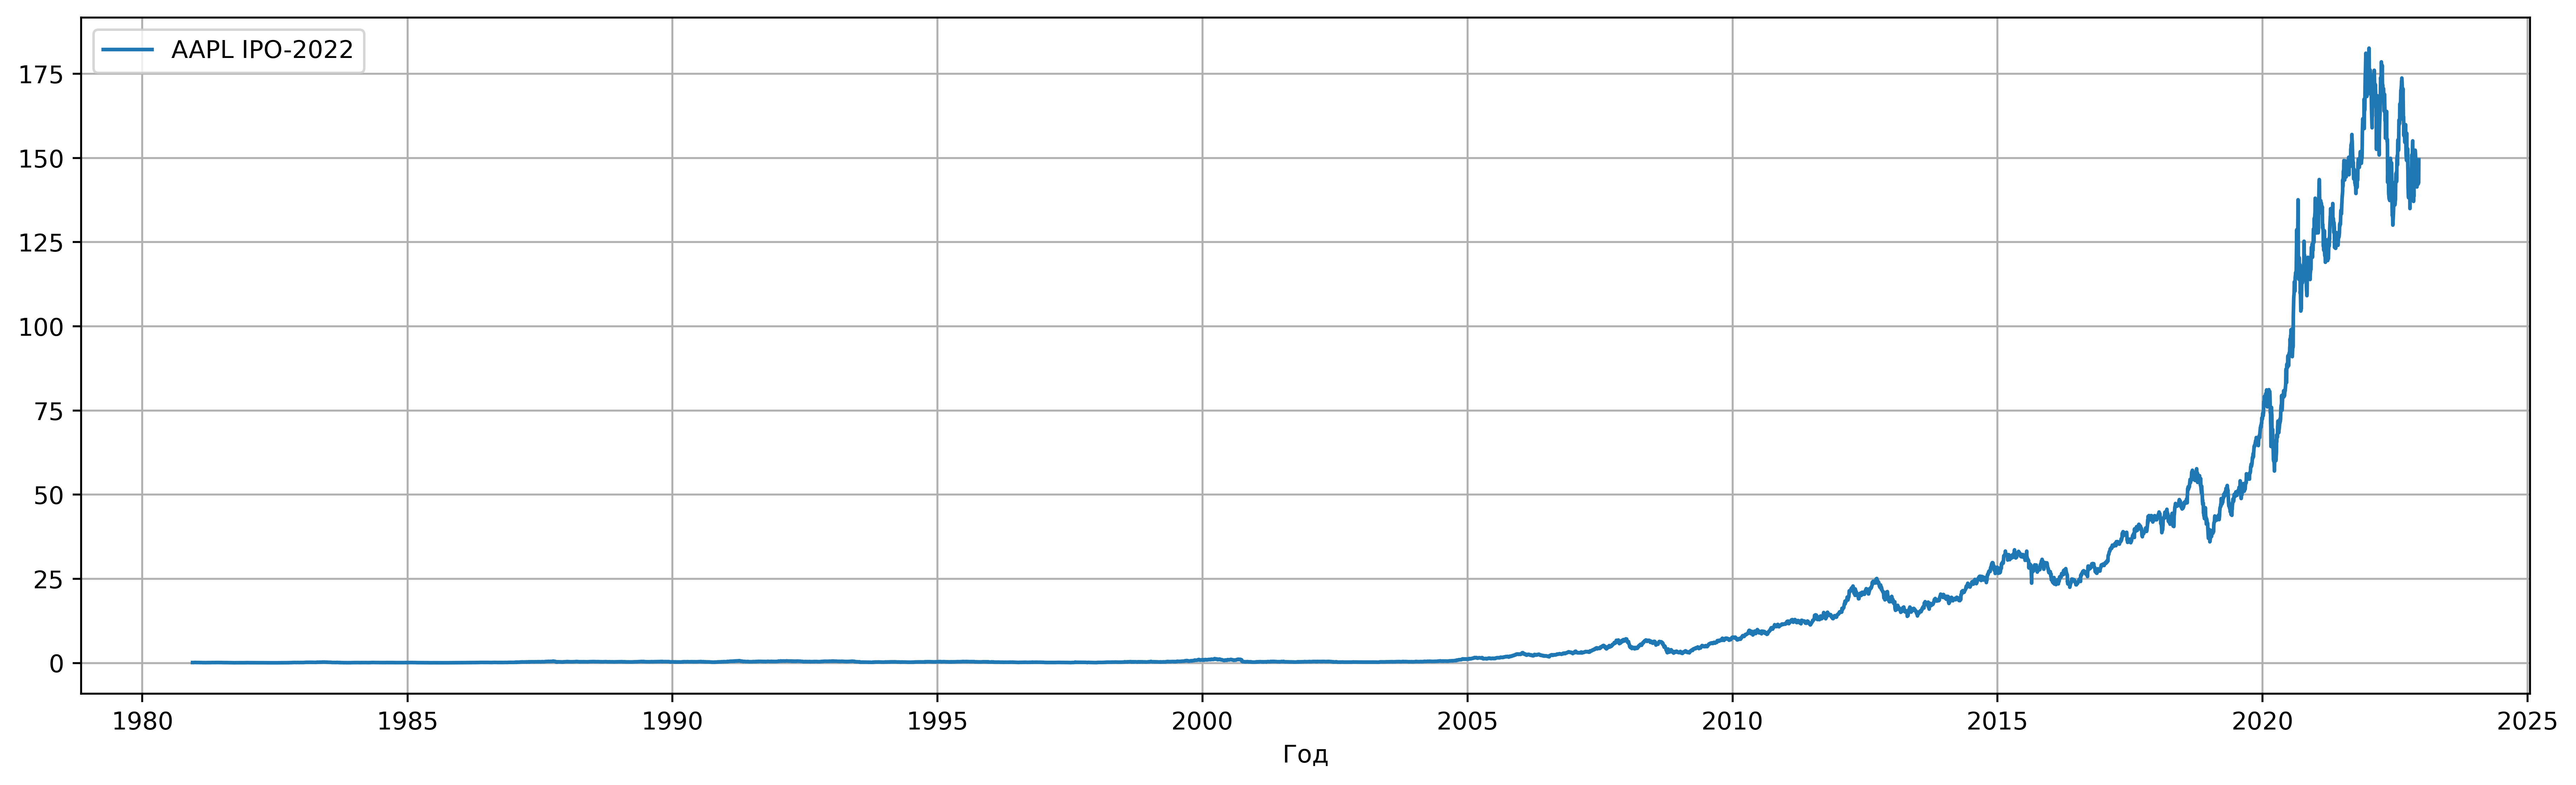

In [5]:
plt.figure(figsize= (18, 5))
plt.grid(True)
plt.plot(dates, open_prices, label= "AAPL IPO-2022")
plt.legend(loc= "best")
plt.xlabel("Год")
# plt.savefig("initial_ts.png")
plt.show()

In [6]:
kpss_test(open_prices)

Results of KPSS Test:


/home/andrew/dev_env/std_env/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Test Statistic            7.95739
p-value                   0.01000
Lags Used                60.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


In [7]:
diff1_open_prices = open_prices.diff().dropna()

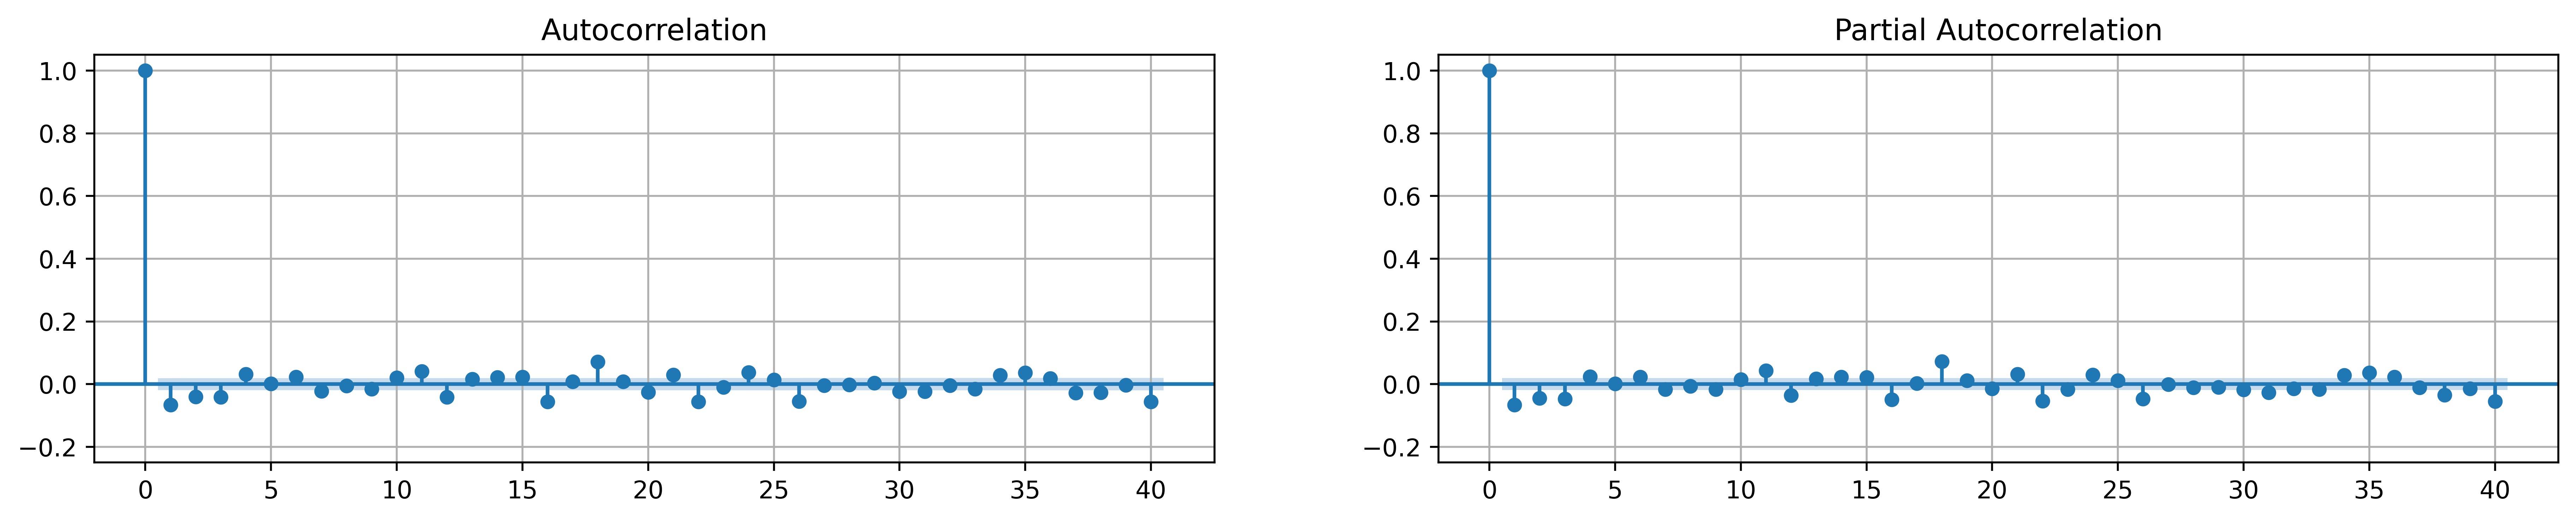

In [8]:
plt.rcParams.update({'figure.dpi' : 500})
f = plt.figure(figsize= (18, 3))

ax1 = f.add_subplot(121)
plot_acf(diff1_open_prices, ax= ax1, lags= 40);
ax1.set_ylim(bottom= -0.25, top= 1.05)
plt.grid(True)

ax2 = f.add_subplot(122)
plot_pacf(diff1_open_prices, method= "ywm", ax= ax2, lags= 40);
ax2.set_ylim(bottom= -0.25, top= 1.05)
plt.grid(True)

# plt.savefig("acf_pacf_for_initial_series.png")
plt.show()

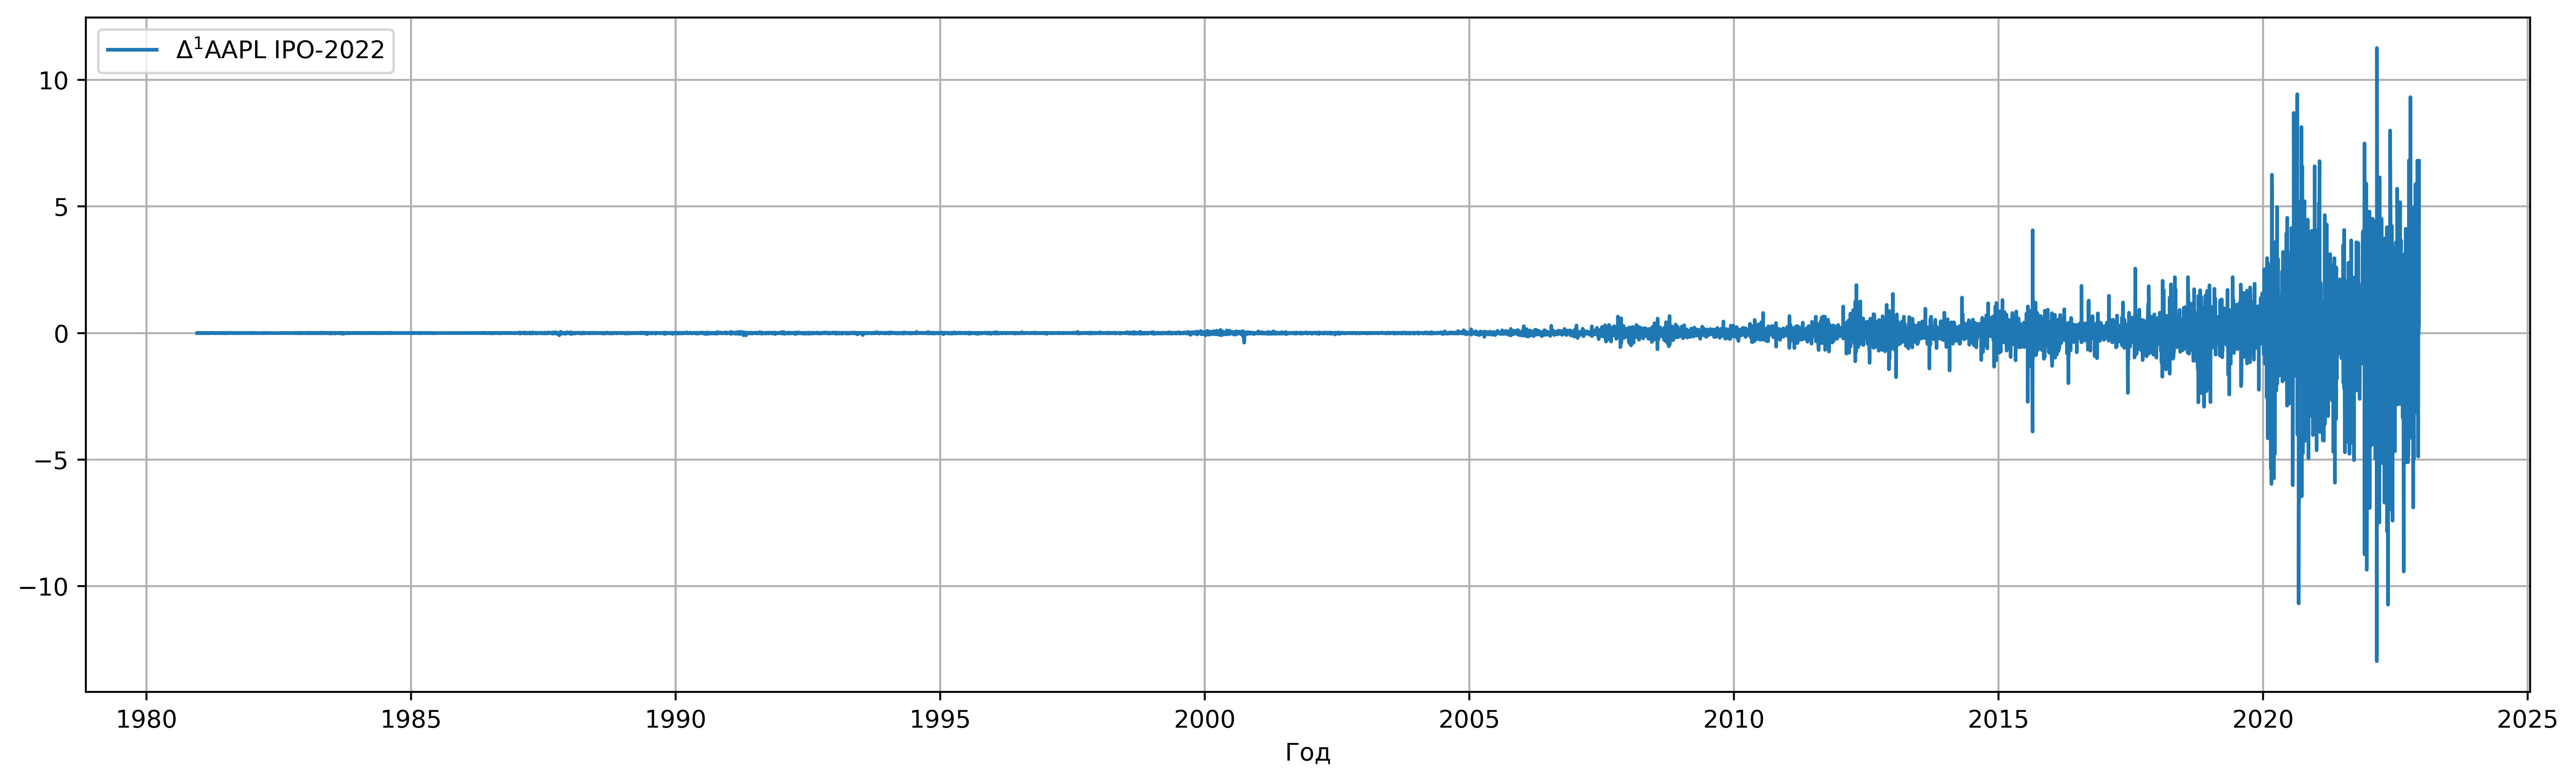

In [9]:
plt.figure(figsize= (18, 5))
plt.grid(True)
plt.plot(dates[1:], diff1_open_prices, label= "$\Delta^1$AAPL IPO-2022")
plt.legend(loc= "best")
plt.xlabel("Год")
# plt.savefig("diff_1_ts.png")
plt.show()

In [10]:
kpss_test(diff1_open_prices)

Results of KPSS Test:


/home/andrew/dev_env/std_env/lib/python3.10/site-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Test Statistic            0.83806
p-value                   0.01000
Lags Used                13.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64


In [11]:
adf_test(diff1_open_prices)

Results of Dickey-Fuller Test:
Test Statistic                   -21.182374
p-value                            0.000000
#Lags Used                        21.000000
Number of Observations Used    10568.000000
Critical Value (1%)               -3.430969
Critical Value (5%)               -2.861814
Critical Value (10%)              -2.566916
dtype: float64


In [12]:
new_df = pd.read_csv("../Data/Illustration Data/AAPL 1980 2022 fd 2.csv")
fd_open_prices = new_df.fd_Open

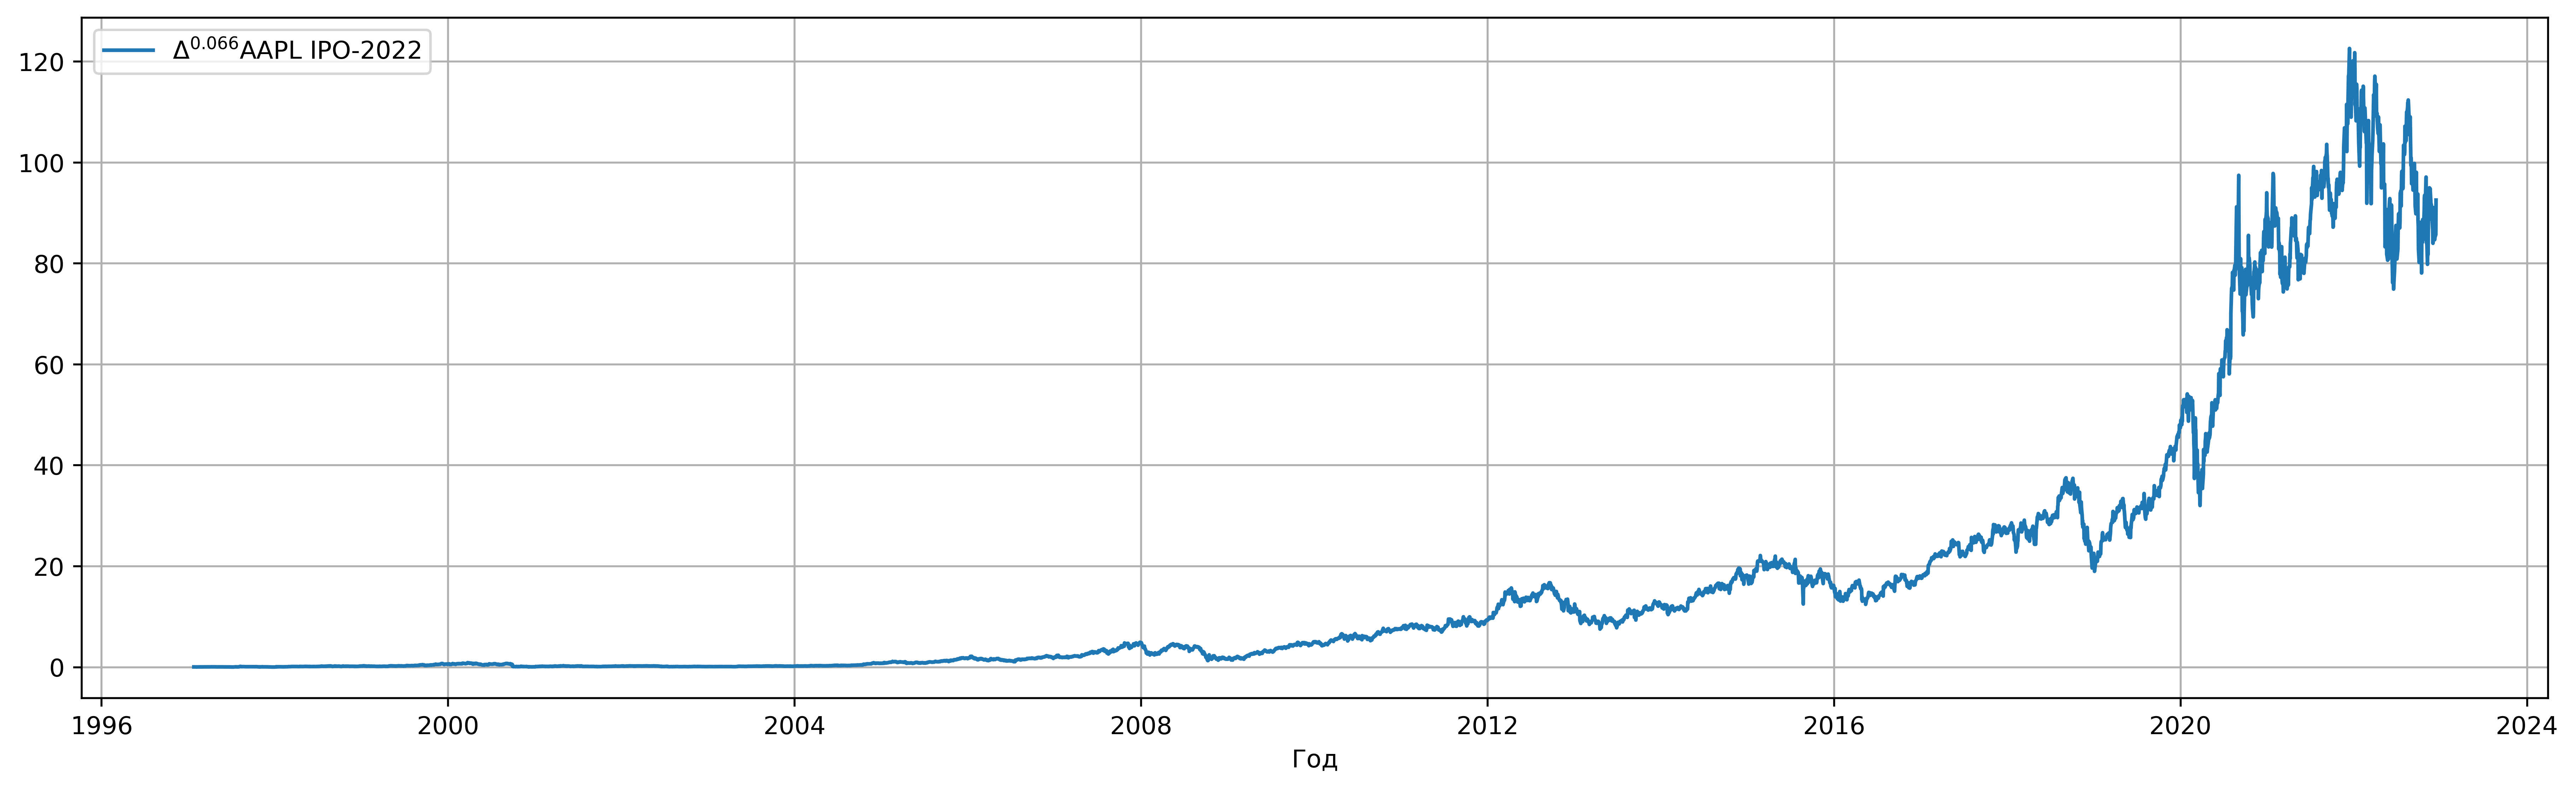

In [17]:
plt.figure(figsize= (18, 5))
plt.grid(True)
plt.plot(dates[4075:], fd_open_prices[4075:], label= "$\Delta^{0.066}$AAPL IPO-2022")
plt.legend(loc= "best")
plt.xlabel("Год")
plt.savefig("frac_diff_ts.png")
plt.show()